## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import re
import tensorflow_datasets as tfds
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## 2. Import Preprocessor module

### Basic cleaning and preprocessing

In [2]:
def clean(data):
    # remove "(<.*?>)" markup
    data = data.apply(lambda x: re.sub('(<.*?>)', ' ', x))
    # remove punctuation marks 
    data = data.apply(lambda x: re.sub('[,\.!?:()"]', '', x))
    # remove whitespace
    data = data.apply(lambda x: x.strip())
    # remove all strings that contain a non-letter
    data = data.apply(lambda x: re.sub('[^a-zA-Z"]',' ',x))
    # convert to lower
    data = data.apply(lambda x: x.lower())
    
    # tokenisation
    words = data.apply(lambda x: text_to_word_sequence(x)) 

    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered = words.apply(lambda x: [w for w in x if not w in stop_words])
    data = filtered.apply(lambda x: " ".join(x))

    # lemmatisation
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x: lemmatizer.lemmatize(x))
    return data

### Writing to csv file

In [3]:
def file_write(X_train, X_test, y_train, y_test):
    train_data = pd.DataFrame(list(zip(X_train, y_train)))
    train_data.to_csv('../data/TrainingSet.csv')
    
    test_data = pd.DataFrame(list(zip(X_test, y_test)))
    test_data.to_csv('../data/TestSet.csv')

## 3. Implementation

**IMDb Reviews** is a large dataset for binary sentiment classification, consisting of 50,000 highly polar reviews (in English) with an even number of examples for training and testing purposes.

The dataset contains additional unlabelled data. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10. No more than 30 reviews are included per movie.

In [4]:
dataset = tfds.load('imdb_reviews', as_supervised=False)

data = pd.DataFrame(dataset['train']).append(pd.DataFrame(dataset['test']))
data.columns=['sentiment', 'review']
data['sentiment'] = [str(s.numpy()) for s in data['sentiment']]
data['review'] = [str(s.numpy()) for s in data['review']]

2022-07-05 01:47:47.320405: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
data.head()

,sentiment,review
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [6]:
data.describe(include='all')

,sentiment,review
count,50000,50000
unique,2,49582
top,0,"b""Loved today's show!!! It was a variety and n..."
freq,25000,5


The number of positive and negative semtiment is equal in the dataset (25,000 each)

0    25000
1    25000
Name: sentiment, dtype: int64


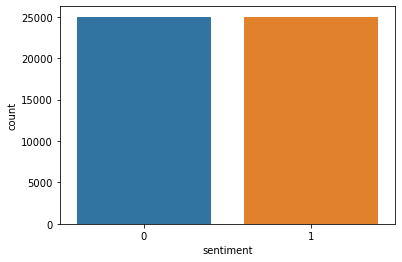

In [7]:
sns.countplot(x='sentiment', data=data)
print(data.sentiment.value_counts())

In [8]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=.2, shuffle=True, random_state=0)

In [9]:
X_temp = X_train[0]

In [10]:
# applying preprocessing functions
X_train = clean(X_train)
X_test = clean(X_test)

In [11]:
print("Before preprocessing:", X_temp)
print()
print("After preprocessing:", X_train[0])

Before preprocessing: 0    b"There are films that make careers. For Georg...
0    b"This was an absolutely terrible movie. Don't...
Name: review, dtype: object

After preprocessing: 0    bthere films make careers george romero night ...
0    bthis absolutely terrible movie lured christop...
Name: review, dtype: object


In [12]:
# # converting sentiments into 0 and 1
# y_train = y_train.apply(lambda x : 1 if x == 'positive' else 0)
# y_test = y_test.apply(lambda x : 1 if x == 'positive' else 0)

In [13]:
# exporting resultant datasets
file_write(X_train, X_test, y_train, y_test)